In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

This notebook creates the dark matter contour and the mix scatter plot

In [2]:
omegacdm_measured = 0.1188
Nsh_min = 60

lev=[30,60,90,120]

def create_filename(folder, filename, L0, mix):
    mixing_angle  = np.format_float_scientific(mix, precision = 2, unique=False)
    lepton_number = np.format_float_scientific(L0, precision = 2, unique=False)

    fn = folder + "/" + filename + 'x' + lepton_number +'x'+ mixing_angle
    
    return fn

In [3]:
def contourplot(L0, mixangle, f, NSH, NSH_contours, save_fig, save_fn, title):
    plt.figure()
    plt.contourf(L0*1e3, mixangle, f, levels=[0,0.2, 0.4, 0.6, 0.8, 1])
    plt.colorbar(label=r"$f = \Omega_s h^2 / (\Omega_{DM} h^2)$")
    if NSH_contours:
        cs =plt.contour(L0*1e3, mixangle, NSH, levels=lev, colors=['w','w','w','w'], linewidths=[3,5,3,3], linestyles=['-.','-', '--',':'])
        plt.clabel(cs, inline=1, fmt='%d', fontsize=12)
    plt.yscale('log')
    plt.xlabel(r"Initial Lepton Number $(\times 10^{-3})$")
    plt.ylabel(r'$\sin^2 2 \theta_{\rm tot}$')
    plt.text(4.6,2.2e-9,r"$\Omega_s h^2 > \Omega_{DM} h^2$")

    plt.xticks([1,3,5,7])
    plt.xlim([1,6])
    if title != "":
        plt.title(title)

    if save_fig:
        plt.savefig(save_fn + ".pdf")
        image_format = 'png'
        image_name = save_fn + ".png"

        plt.savefig(image_name, format=image_format, dpi=72)
        print("Image saved {}".format(image_name))

    plt.show()



In [4]:
def scatter(L0, mixangle, f, NSH, save_fig, save_fn, title):
    plt.figure()
    for i in range(len(mixangle)):
        for j in range(len(L0)):
            if NSH[i,j] > Nsh_min:
                plt.plot(f[i,j], NSH[i,j], 'o', color='k')
            else:
                plt.plot(f[i,j], NSH[i,j], 'x', color='0.75')
    plt.axhline(Nsh_min, color='k', linestyle='--')
    plt.xlabel(r'$f = \Omega_s h^2 / (\Omega_{\rm DM} h^2)$')
    plt.ylabel('Number of Subhalos')
    plt.xlim([0,1])
    plt.ylim([30,160])

    if title != "":
        plt.title(title)
    if save_fig:
        image_format = 'png'
        image_name = save_fn + ".png"

        plt.savefig(image_name, format=image_format, dpi=72)
        print("Image saved {}".format(image_name))
    plt.show()        


In [5]:
def mixscatter(L0, mixangle, f, NSH, mx_astro, save_fig, save_fn, title):
    plt.figure()
    
    norm = mpl.colors.Normalize(vmin=60,vmax=160)
    cdict = {
        'red': (
            (0,  0.0, 0.0),
            (1.0,  0, 0),
        ),
        'green': (
            (0,  0.0, 0.0),
            (0, 1.0, 1.0),
            (1.0,  0, 0),
        ),
        'blue': (
            (0,  0.0, 0.0),
            (1.0,  1, 1),
        )
    }
    cc = mpl.colors.LinearSegmentedColormap('magic', cdict)

    fig = plt.figure()
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cc))
    colorbar.set_label('Number of Subhalos')
    
    for i in range(len(mixangle)):
        for j in range(len(L0)):
            if NSH[i,j] > Nsh_min:
                plt.plot(f[i,j], mx_astro[i,j], 'o', color=(0, (160-NSH[i,j])/(160-Nsh_min), 1-(160-NSH[i,j])/(160-Nsh_min)))
            else:
                plt.plot(f[i,j], mx_astro[i,j], 'x', color='0.75')

    plt.yscale('log')
    plt.xlim([0,1])
    plt.ylabel(r'$\sin^2 2 \theta_{\rm astro}$')
    plt.xlabel(r'$f = \Omega_s h^2 / (\Omega_{\rm DM} h^2)$')
    if title != "":
        plt.title(title)
    if save_fig:
        plt.savefig(save_fn + ".pdf")
        image_format = 'png'
        image_name = save_fn + ".png"

        plt.savefig(image_name, format=image_format, dpi=72)
        print("Image saved {}".format(image_name))
        
    plt.show()


In [6]:
def catalog_f(L0, mixangle, f, NSH, f_min, f_max, folder, filename):
    for i in range(len(mixangle)):
        for j in range(len(L0)):
            fn = create_filename(folder, filename, L0[j], mixangle[i])
            dat = np.load(fn + ".npz", allow_pickle=True)
            om = dat['omega_h2'].item()

            if f_min < om/omegacdm_measured < f_max and not np.isnan(NSH[i,j]):
                plt.figure()
                e = dat['epsilon']
                fe = dat['final_distribution']
                plt.plot(e, e**2 * fe)
                plt.title("{:.1f}%, N = {:d}, {:.3}, L0 = {:.4f}".format(om/omegacdm_measured*100, int(NSH[i,j]),mixangle[i], L0[j]))
                plt.show()


In [7]:
def catalog_mix(L0, mixangle, f, NSH, ma, folder, filename):
    if ma < mixangle[1]:
        index = 0
    else:
        index = np.where(mixangle < ma)[0][-1]

    for j in range(len(L0)):
        fn = create_filename(folder, filename, L0[j], mixangle[index])
        dat = np.load(fn + ".npz", allow_pickle=True)
        om = dat['omega_h2'].item()

        if om < omegacdm_measured and not np.isnan(NSH[i,j]):
            plt.figure()
            e = dat['epsilon']
            fe = dat['final_distribution']
            plt.plot(e, e**2 * fe)
            plt.title("{:.1f}%, N = {:d}, L0 = {:.4f}".format(om/omegacdm_measured*100, int(NSH[i,j]), L0[j]))
            plt.show()


In [8]:
class MSNDM_model:
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        
        self.nofile= False
        
        if not os.path.isdir(folder):
            print("Folder {} does not exist. Abort.".format(folder))
            self.nofile = True
            
        if not os.path.exists("{}/{}-results.npz".format(folder, filename)):
            print("Output file {} from Num_SH.solve() does not exist. Abort.")
            self.nofile = True
        else:
            npz = np.load("{}/{}-results.npz".format(folder,filename),allow_pickle=True)
            
            a = npz['results']
            ii = npz['index']
            mm = npz['mixangle']
            ll = npz['L0']

            self.f = np.zeros((len(mm), len(ll)))
            self.NSH = np.zeros_like(self.f)
            for i in range(len(ii)):
                self.f[ii[i][0], ii[i][1]] = a[i,0] / omegacdm_measured
                self.NSH[ii[i][0], ii[i][1]] = a[i,1]
                
            self.mx_astro = np.zeros_like(self.f)
            for i in range(len(mm)):
                for j in range(len(ll)):
                    self.mx_astro[i,j] = self.f[i,j] * mm[i]
                
            self.mixangle = mm
            self.L0 = ll
            
            if os.path.exists(create_filename(folder, filename, ll[0], mm[0])+".npz"):
                self.data_files = True
            else:
                self.data_files = False

    def make_contourplot(self, NSH_contours = True, save_fig = False, save_fn = "", title=""):
        if save_fn == "":
            save_fn = '{}/{}-contour'.format(self.folder, self.filename)
        if self.nofile:
            print("No data file for this model exists. Abort.")
            return
            
        contourplot(self.L0, self.mixangle, self.f, self.NSH, NSH_contours, save_fig, save_fn, title)
    
    def make_scatter(self, save_fig = False, save_fn = "",title=""):
        if save_fn == "":
            save_fn = '{}/{}-contour'.format(self.folder, self.filename)
        if self.nofile:
            print("No data file for this model exists. Abort.")
            return
    
        scatter(self.L0, self.mixangle, self.f, self.NSH, save_fig, save_fn, title)
        
    def make_mixscatter(self, save_fig = False, save_fn = "",title=""):
        if save_fn == "":
            save_fn = '{}/{}-contour'.format(self.folder, self.filename)
        if self.nofile:
            print("No data file for this model exists. Abort.")
            return
    
        mixscatter(self.L0, self.mixangle, self.f, self.NSH, self.mx_astro, save_fig, save_fn, title)
        
    def plot_catalog_f(self, f_min, f_max):
        if self.nofile:
            print("No data file for this model exists. Abort.")
            return

        if not self.data_files:
            print("No individual model files for this model.  Abort.")
            return
        
        catalog_f(self.L0, self.mixangle, self.f, self.NSH, f_min, f_max, self.folder, self.filename)
        
        
    def plot_catalog_mix(self, ma):
        if self.nofile:
            print("No data file for this model exists. Abort.")
            return

        if not self.data_files:
            print("No individual model files for this model.  Abort.")
            return
        
        catalog_mix(self.L0, self.mixangle, self.f, self.NSH, ma, self.folder, self.filename)
        
        

In [9]:
data = MSNDM_model("../new_QCD/New-ThreeEqual", "three_equal")

Image saved contour.png


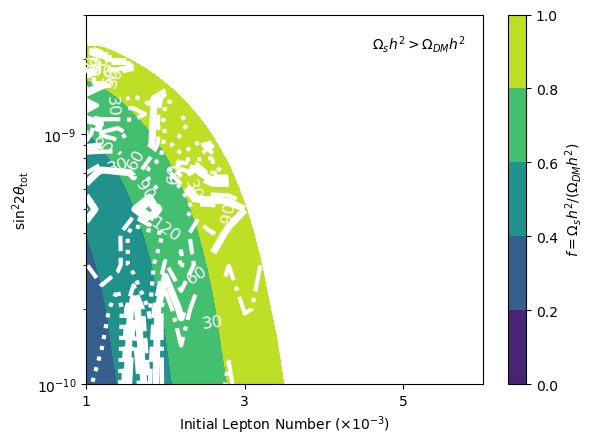

Image saved mixscatterplot.png


<Figure size 640x480 with 0 Axes>

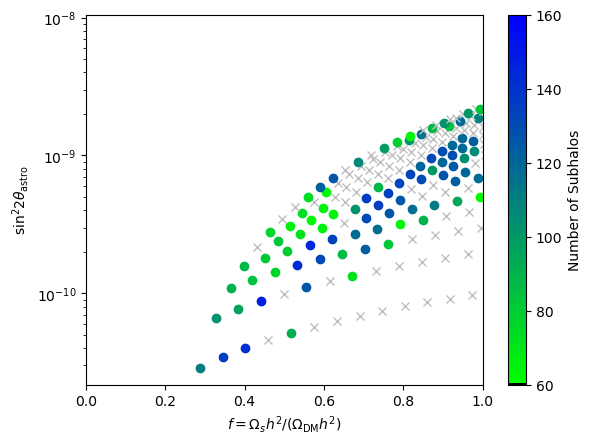

In [10]:
data.make_contourplot(save_fig=True, save_fn="contour")
data.make_mixscatter(save_fig=True, save_fn="mixscatterplot")

In [11]:
folder_list = ["ThreeEqual", "Tau", "Tau-MoreL", "Tau-LessL", "AllTau"]
file_list = ["three_equal", "mostly_tau", "mostly_tau_tauL", "mostly_tau_emuL", "all_tau"]
#title_list = [r"mixing $e = \mu = \tau$; L0 $e = \mu = \tau$", 
             # r"mixing: $\tau$ 10x, $e/\mu$ 1x; L0 $e = \mu = \tau$", 
           #   r"mix $\tau$ 10x, $e/\mu$ 1x; L0 $\tau$ 2x, $e/\mu$ 1x",
           #   r"mix $\tau$ 10x, $e/\mu$ 1x; L0 $\tau$ 1x, $e/\mu$ 2x",
          #    r"All $\tau$"]
title_list = [" ", 
             " ", 
           " ",
             " ",
          " "]

In [18]:
data = []
for i in range(len(folder_list)):
    data.append(MSNDM_model("../new_QCD/New-ThreeEqual", "three_equal"))


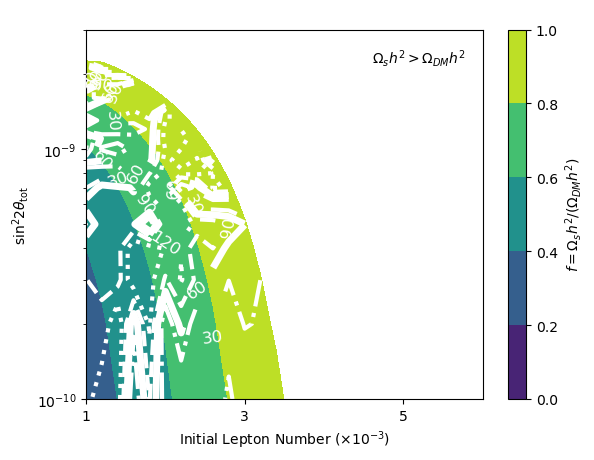

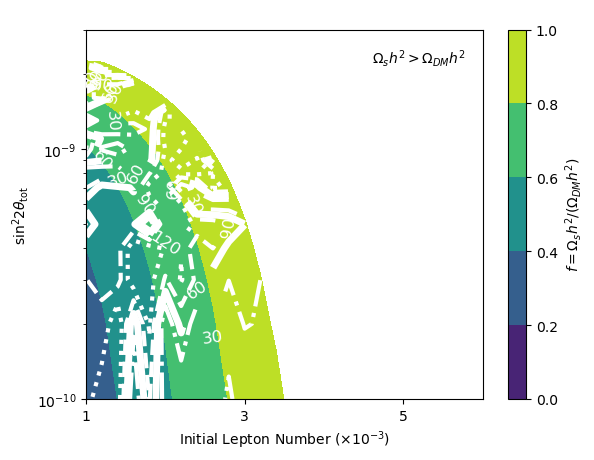

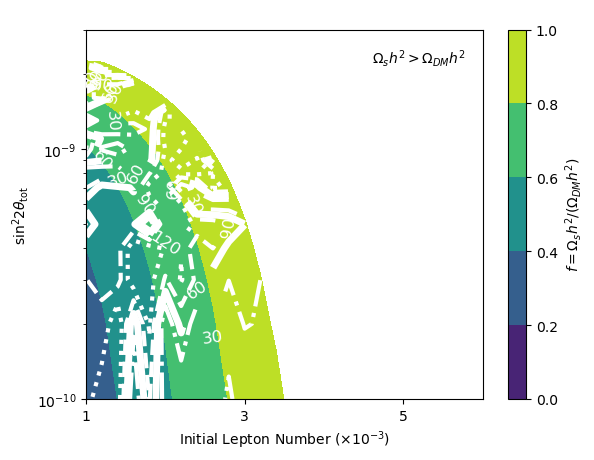

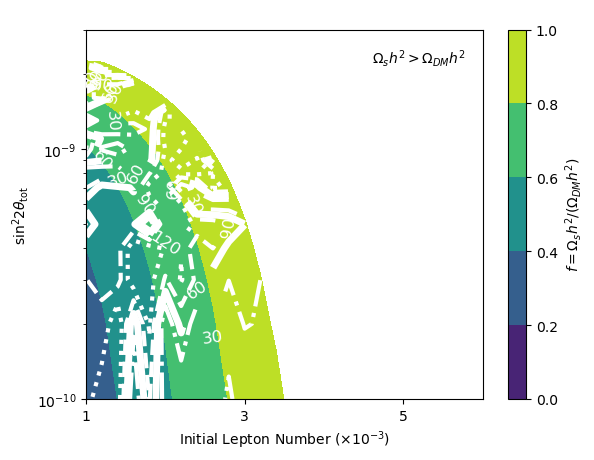

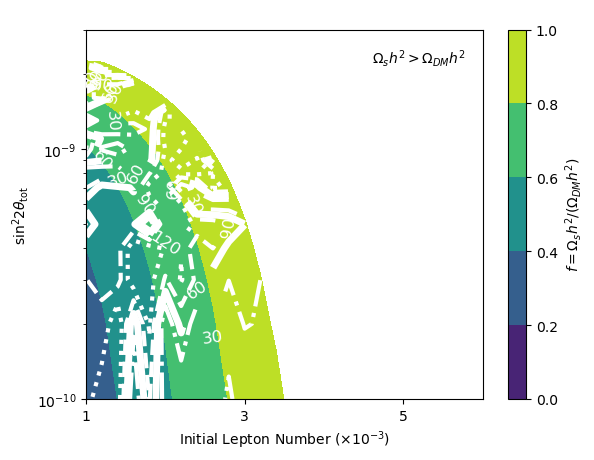

In [19]:
for i in range(len(data)):
    data[i].make_contourplot(title=title_list[i])

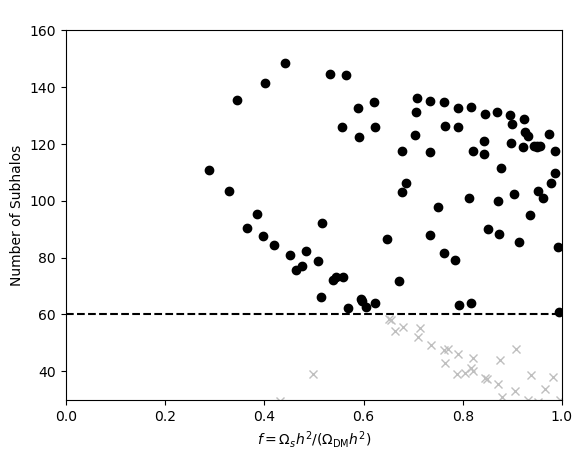

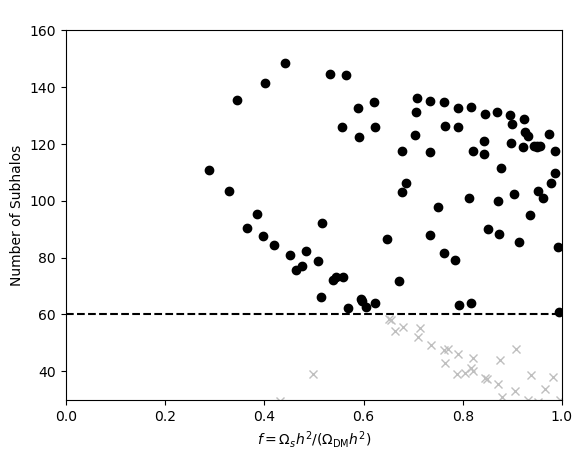

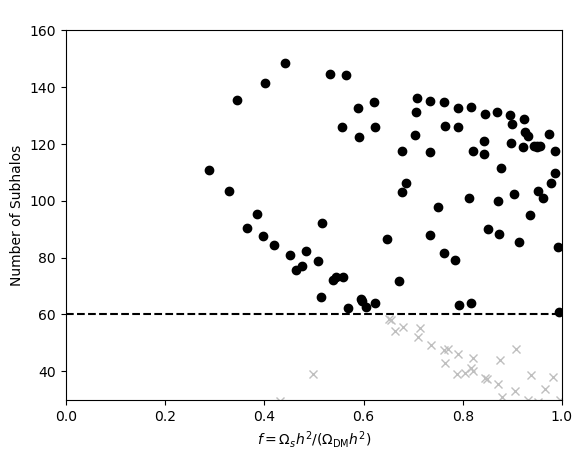

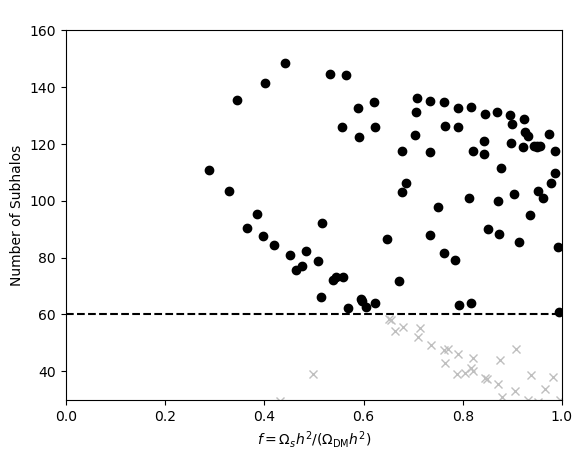

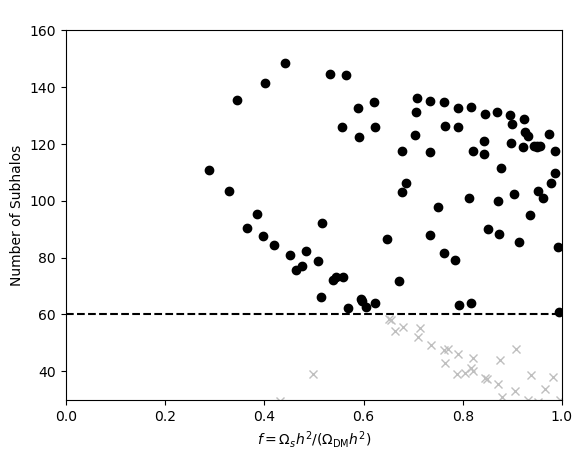

In [20]:
for i in range(len(data)):
    data[i].make_scatter(title=title_list[i])

<Figure size 640x480 with 0 Axes>

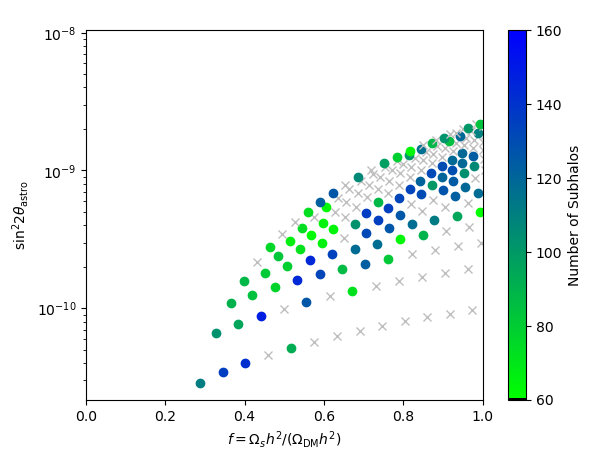

<Figure size 640x480 with 0 Axes>

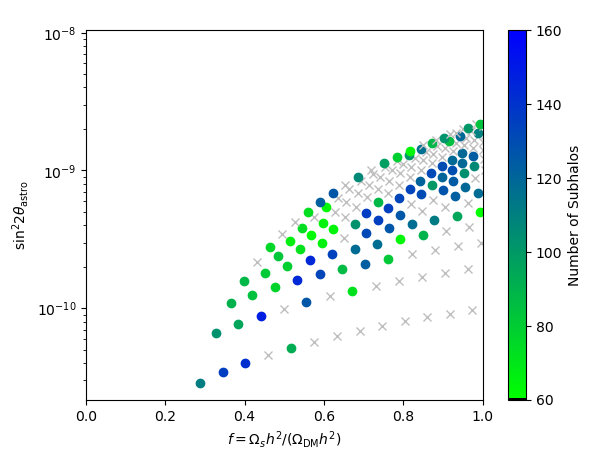

<Figure size 640x480 with 0 Axes>

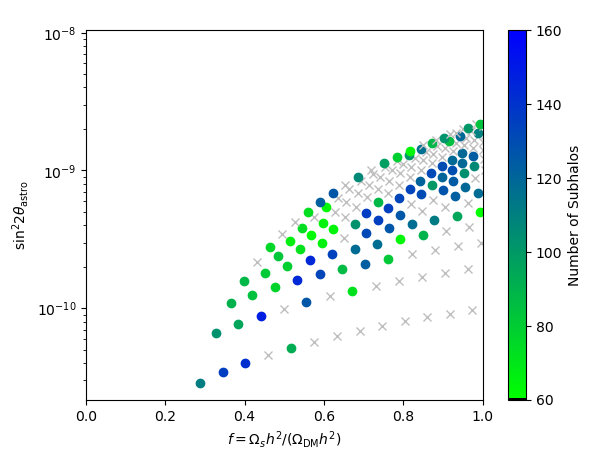

<Figure size 640x480 with 0 Axes>

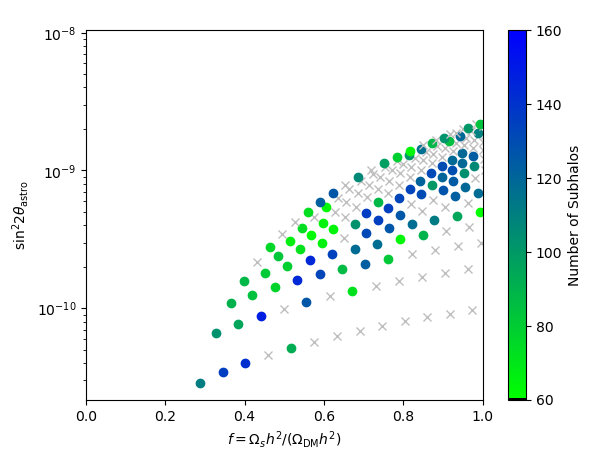

<Figure size 640x480 with 0 Axes>

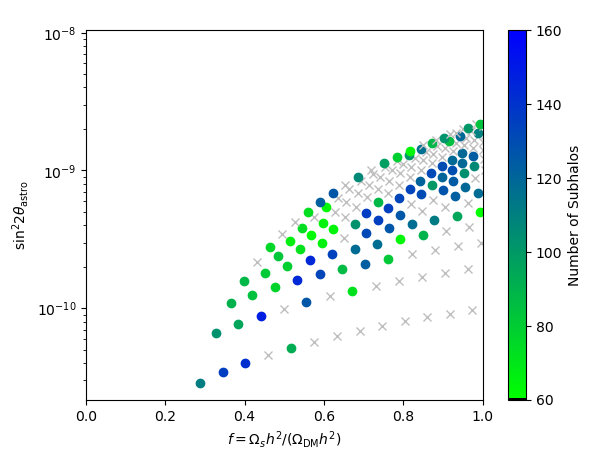

In [21]:
for i in range(len(data)):
    data[i].make_mixscatter(title=title_list[i])

Image saved 0-mixscatter.png


<Figure size 640x480 with 0 Axes>

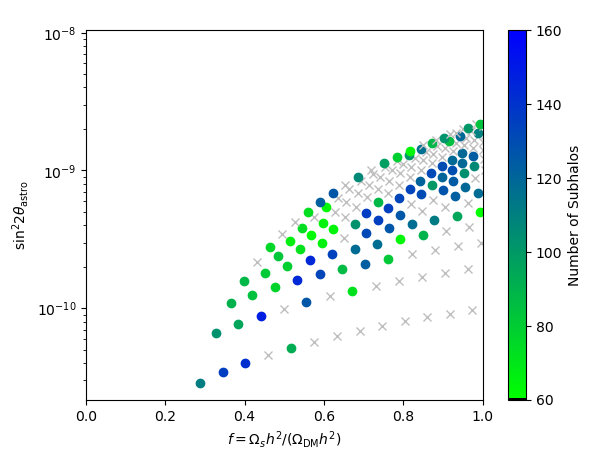

Image saved 1-mixscatter.png


<Figure size 640x480 with 0 Axes>

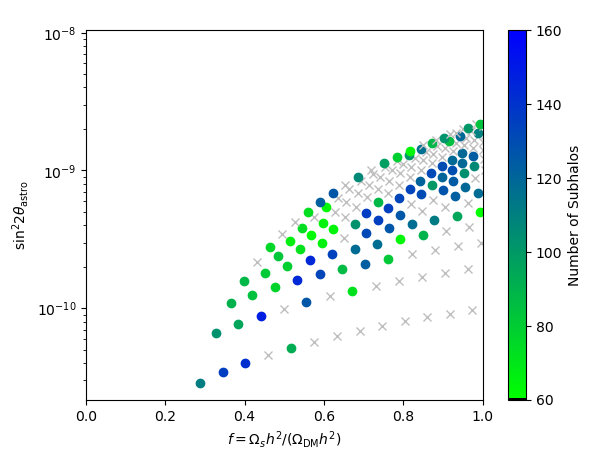

Image saved 2-mixscatter.png


<Figure size 640x480 with 0 Axes>

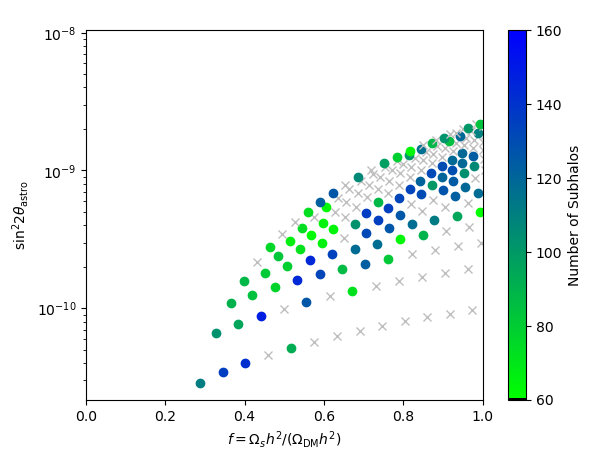

Image saved 3-mixscatter.png


<Figure size 640x480 with 0 Axes>

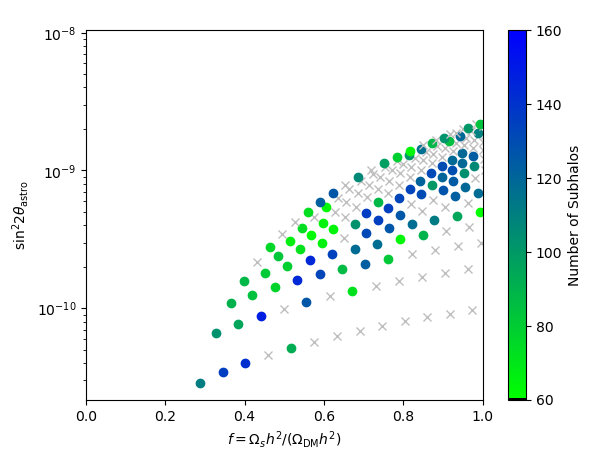

Image saved 4-mixscatter.png


<Figure size 640x480 with 0 Axes>

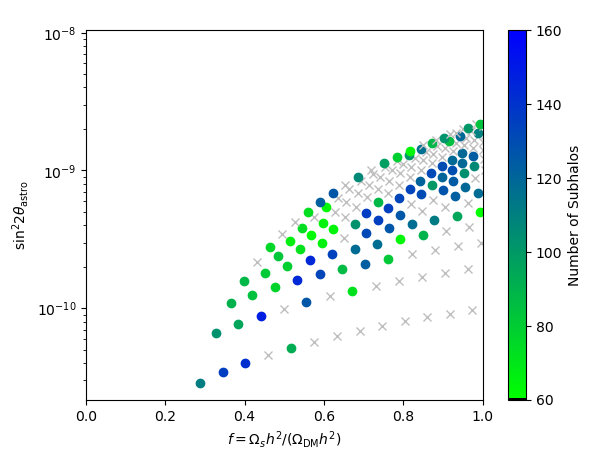

In [22]:
#saving the mixscatter plot
for i in range(len(data)):
    data[i].make_mixscatter(title=title_list[i], save_fig=True, save_fn="{}-mixscatter".format(i))

Image saved 0-contourplot.png


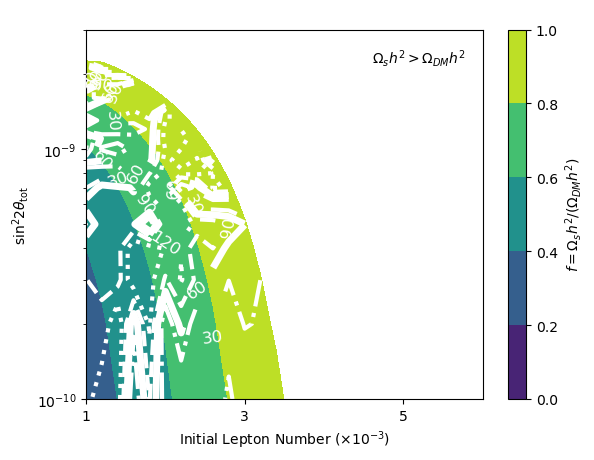

Image saved 1-contourplot.png


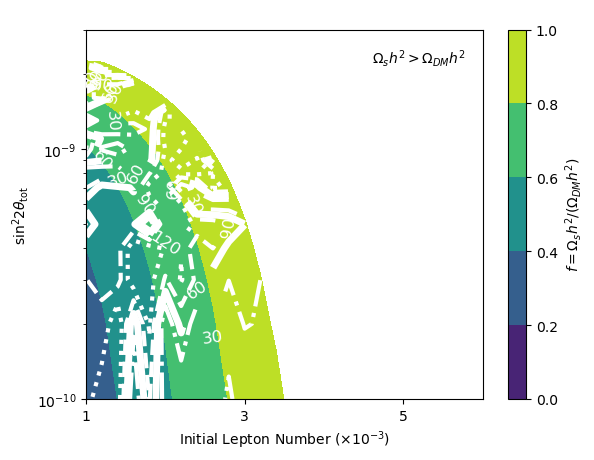

Image saved 2-contourplot.png


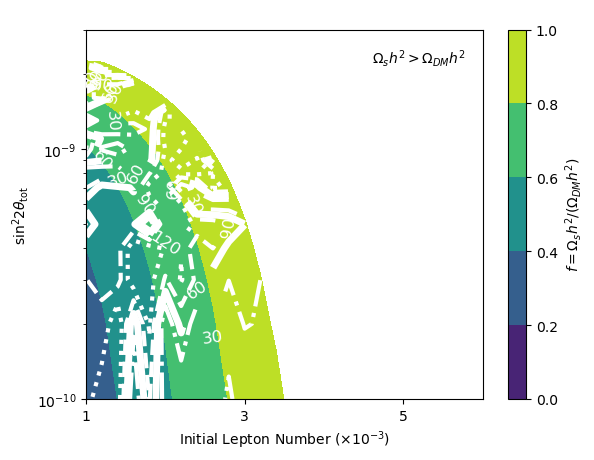

Image saved 3-contourplot.png


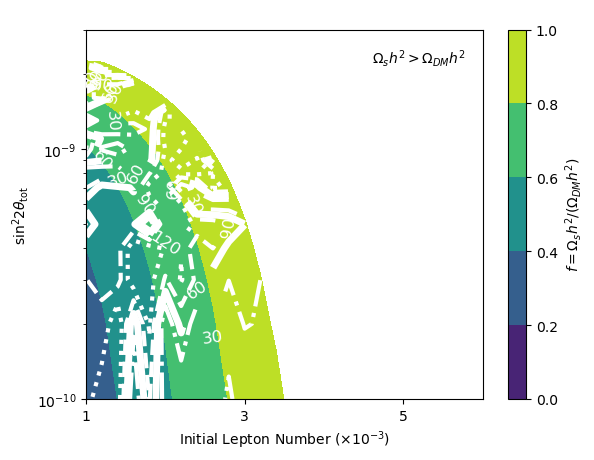

Image saved 4-contourplot.png


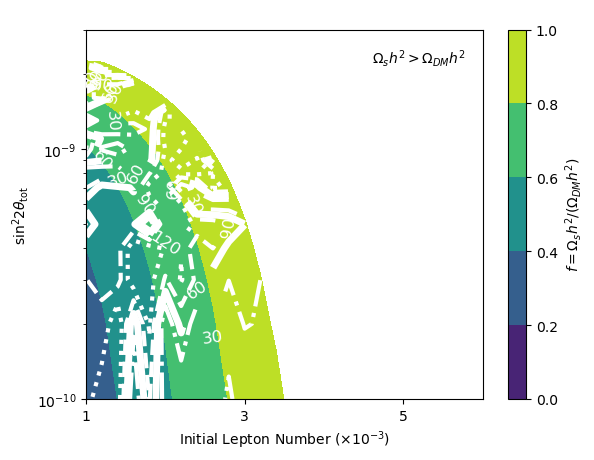

In [23]:
#saving the contour plot
for i in range(len(data)):
    data[i].make_contourplot(title=title_list[i], save_fig=True, save_fn="{}-contourplot".format(i))